In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

%matplotlib inline

## Data Description

The columns/variables in this dataset are:  
> **Y** = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers  
**X1** = my order was delivered on time   
**X2** = contents of my order was as I expected  
**X3** = I ordered everything I wanted to order  
**X4** = I paid a good price for my order   
**X5** = I am satisfied with my courier  
**X6** = the app makes ordering easy for me   

In [2]:
df = pd.read_csv('./ACME-HappinessSurvey2020.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
## checking to see if there are any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
## rename columns to show what they're representing

df.rename(columns={'X1': 'on_time', 'X2':'contents', 'X3':'everything_ordered', 'X4':'price', 'X5':'satisfaction', 'X6':'ease_of_use'}, inplace=True)
df.head()

,Y,on_time,contents,everything_ordered,price,satisfaction,ease_of_use
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
df.corr()

,Y,on_time,contents,everything_ordered,price,satisfaction,ease_of_use
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
on_time,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
contents,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
everything_ordered,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
price,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
satisfaction,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
ease_of_use,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


In [6]:
df.describe()

,Y,on_time,contents,everything_ordered,price,satisfaction,ease_of_use
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
X = df.drop(labels='Y', axis=1)
y = df['Y']

In [8]:
## checking customer happiness percentage
y.value_counts(normalize=True)

1    0.547619
0    0.452381
Name: Y, dtype: float64

55% percent happiness amongst customers suggests there is room for improvement for the food delivery service.

In [9]:
## split data into training and test sets, using 75% of the data for training and 25% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [46]:
## run all features through a logistic regression model

logreg = LogisticRegression(solver='liblinear')
baseline = logreg.fit(X_train, y_train)
baseline

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_hat_train = baseline.predict(X_train)
y_hat_test = baseline.predict(X_test)

In [48]:
#find out accuracy score of baseline model

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6063829787234043
Testing Accuracy:  0.5625


Pretty low accuracy score at 56% for the testing data, will use feature selection to try and improve our score.

## Chi Squared Feature Selection

In [49]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 0.556463
Feature 1: 0.721779
Feature 2: 0.288686
Feature 3: 0.064454
Feature 4: 0.870701
Feature 5: 0.305873


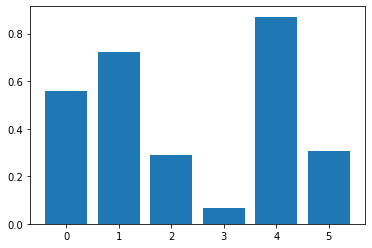

In [50]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Looks like the most important features for customer happiness are satisfaction with courier, contents of order as expected, and order delivered on time. The next most important features are ease of ordering and ordering everything the customer wants to order. The least important feature is price. Let's run a logistic regression model using the top 3 and the top 5 features. 

In [51]:
## top 3 features

fs = SelectKBest(score_func=chi2, k=3)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

chi_2 = logreg.fit(X_train_fs, y_train)
chi_2

y_hat_train = chi_2.predict(X_train_fs)
y_hat_test = chi_2.predict(X_test_fs)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6595744680851063
Testing Accuracy:  0.65625


Using the top 3 features our training accuracy score increased by about 5% and our testing accuracy increased by 9%! Let's see if using 5 features increases or decreases our accuracy.

In [52]:
## top 5 features

fs = SelectKBest(score_func=chi2, k=5)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

chi_2 = logreg.fit(X_train_fs, y_train)
chi_2

y_hat_train = chi_2.predict(X_train_fs)
y_hat_test = chi_2.predict(X_test_fs)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6595744680851063
Testing Accuracy:  0.59375


Using 5 features decreases our accuracy score, it seems like its best to use 3 features with the chi squared feature selection. Next we'll try mutual information feature selection.

## Mutual Information Feature Selection

Feature 0: 0.140141
Feature 1: 0.010806
Feature 2: 0.085324
Feature 3: 0.012477
Feature 4: 0.032301
Feature 5: 0.090515


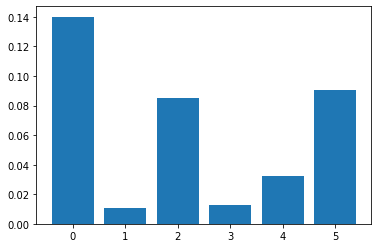

In [53]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [54]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

mis = logreg.fit(X_train_fs, y_train)
mis

y_hat_train = mis.predict(X_train_fs)
y_hat_test = mis.predict(X_test_fs)

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))

Training Accuracy:  0.6063829787234043
Testing Accuracy:  0.625


Using mutual information feature selection the accuracy score is better than the baseline model but does not perform better than the chi squared feature selection.